In [2]:
from tensorflow.keras.models import Model as KerasModel
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Embedding, LSTM
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow import keras
import matplotlib.pyplot as plt

In [1]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.3.1
Keras Version: 2.4.0

Python 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.3
Scikit-Learn 0.24.1
GPU is available


In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [4]:
train_dir = 'dataset/train_images'
val_dir = 'dataset/val_images'
test_dir = 'dataset/test_images'

#datagen = ImageDataGenerator(1./255)
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    batch_size=64,
    image_size=(256,256),
    seed=123,
    color_mode='rgb',
    subset = 'training'
)
val_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    batch_size=64,
    image_size=(256,256),
    seed=123,
    color_mode='rgb',
    subset = 'validation'
)
print(train_generator.class_names)

Found 16410 files belonging to 2 classes.
Using 13128 files for training.
Found 16410 files belonging to 2 classes.
Using 3282 files for validation.
['fake', 'real']


In [5]:
for batch, label in train_generator:
    print(batch.shape)
    print(label.shape)
    break

(64, 256, 256, 3)
(64,)


In [6]:
#CNN model
cnn_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2)
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [7]:
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [8]:
history = cnn_model.fit(train_generator,
                   validation_data=val_generator,
                   epochs=10)

Epoch 1/10
206/206 [==============================] - 29s 143ms/step - loss: 0.5248 - accuracy: 0.7536 - val_loss: 0.3363 - val_accuracy: 0.8714
Epoch 2/10
206/206 [==============================] - 29s 139ms/step - loss: 0.2768 - accuracy: 0.8876 - val_loss: 0.3264 - val_accuracy: 0.8720
Epoch 3/10
206/206 [==============================] - 29s 143ms/step - loss: 0.2085 - accuracy: 0.9181 - val_loss: 0.2087 - val_accuracy: 0.9177
Epoch 4/10
206/206 [==============================] - 29s 140ms/step - loss: 0.1463 - accuracy: 0.9413 - val_loss: 0.2646 - val_accuracy: 0.9129
Epoch 5/10
206/206 [==============================] - 29s 143ms/step - loss: 0.1190 - accuracy: 0.9546 - val_loss: 0.2309 - val_accuracy: 0.9241
Epoch 6/10
206/206 [==============================] - 30s 144ms/step - loss: 0.0953 - accuracy: 0.9639 - val_loss: 0.2364 - val_accuracy: 0.9254
Epoch 7/10
206/206 [==============================] - 33s 162ms/step - loss: 0.0765 - accuracy: 0.9715 - val_loss: 0.2427 - val_ac

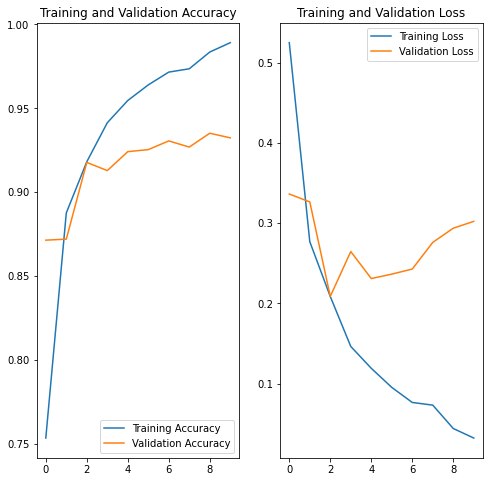

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
#CNN model with dropout
cnn_model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2)
])

cnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)       

In [11]:
cnn_model2.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [12]:
history2 = cnn_model2.fit(train_generator,
                   validation_data=val_generator,
                   epochs=10)

Epoch 1/10
206/206 [==============================] - 32s 156ms/step - loss: 0.5348 - accuracy: 0.7537 - val_loss: 0.3518 - val_accuracy: 0.8498
Epoch 2/10
206/206 [==============================] - 32s 155ms/step - loss: 0.3005 - accuracy: 0.8768 - val_loss: 0.2804 - val_accuracy: 0.8839
Epoch 3/10
206/206 [==============================] - 32s 156ms/step - loss: 0.2281 - accuracy: 0.9100 - val_loss: 0.2585 - val_accuracy: 0.9016
Epoch 4/10
206/206 [==============================] - 32s 156ms/step - loss: 0.1826 - accuracy: 0.9277 - val_loss: 0.2362 - val_accuracy: 0.9129
Epoch 5/10
206/206 [==============================] - 32s 155ms/step - loss: 0.1457 - accuracy: 0.9433 - val_loss: 0.2606 - val_accuracy: 0.9007
Epoch 6/10
206/206 [==============================] - 32s 156ms/step - loss: 0.1198 - accuracy: 0.9545 - val_loss: 0.2770 - val_accuracy: 0.9062
Epoch 7/10
206/206 [==============================] - 33s 159ms/step - loss: 0.0984 - accuracy: 0.9621 - val_loss: 0.2663 - val_ac

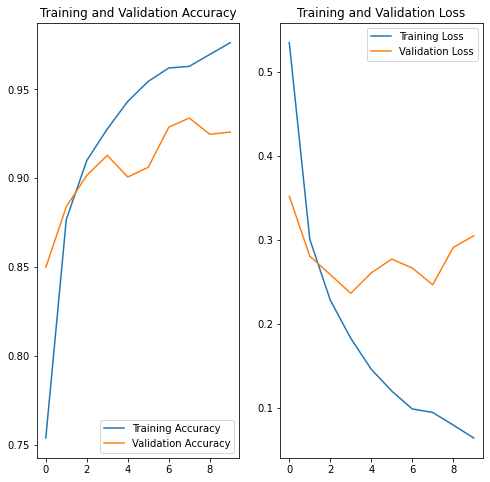

In [13]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()